In [18]:
import string
from collections import defaultdict
import unicodedata
import matplotlib.pyplot as plt

In [19]:
numbers = ['0','1','2','3','4','5','6','7','8','9']

Обработка текстов и создание словарей с n-граммами

In [20]:
def dictionaries(file_path, numbers, n, max_words=3000):

    with open(file_path, 'r', encoding='utf-8') as text_file:
        text = text_file.read()

    for i in string.punctuation:
        text = text.replace(i, '')

    for number in numbers:
        text = text.replace(number, '')

    text = text.replace('\n', ' ')
    text = text.strip()
    text = text.lower()

    text = unicodedata.normalize('NFD', text)

    text = ''.join(c for c in text if unicodedata.category(c) != 'Mn')

    bigrams = defaultdict(int)
    words = text.split()[:max_words]

    for word in words:
        for j in range(len(word) - (n-1)):
            bigram = word[j:j+n]
            bigrams[bigram] += 1

    return dict(bigrams)

In [21]:
def get_top_ngrams(ngrams_dict, top_n=20):
    sorted_ngrams = sorted(ngrams_dict.items(), key=lambda item: item[1], reverse=True)
    return dict(sorted_ngrams[:top_n])

Визуализация

In [33]:
def plot_frequencies(ngrams_dict, title):
    plt.figure(figsize=(10, 5))
    plt.bar(ngrams_dict.keys(), ngrams_dict.values())
    plt.xlabel('N-grams')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [22]:
def plot_frequencies_in_row(ngrams_dicts, titles):
    num_plots = len(ngrams_dicts)
    fig, axs = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))  # Создаем подграфики в ряд

    for ax, (ngrams_dict, title) in zip(axs, zip(ngrams_dicts, titles)):
        ax.bar(ngrams_dict.keys(), ngrams_dict.values())
        ax.set_xlabel('N-grams')
        ax.set_ylabel('Frequency')
        ax.set_title(title)
        ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

Подсчет схожести словарей с n-граммами языков и тестового текста

In [23]:
def compare_bigrams(test_bigrams, language_bigrams):
    similarity = 0
    for bigram, count in test_bigrams.items():
        similarity += min(count, language_bigrams.get(bigram, 0))
    return similarity

Выбор наиболее похожих словарей

In [24]:
def predict_language(test_text, language_dictionaries):

    test_bigrams = dictionaries(test_text, numbers, n)

    similarities = {}
    for language, bigrams in language_dictionaries.items():
        similarity = compare_bigrams(test_bigrams, bigrams)
        similarities[language] = similarity

    sorted_languages = sorted(similarities.items(), key=lambda item: item[1], reverse=True)

    return sorted_languages[:3]

Все словари

In [175]:
n = 6 #подставить нужное значение

language_dictionaries = {
    'english': dictionaries('english.txt', numbers, n),
    'french': dictionaries('french.txt', numbers, n),
    'german': dictionaries('german.txt', numbers, n),
    'italian': dictionaries('italian.txt', numbers, n),
    'spanish': dictionaries('spanish.txt', numbers, n),
    'portuguese': dictionaries('portuguese.txt', numbers, n),
    'dutch': dictionaries('dutch.txt', numbers, n),
    'danish': dictionaries('danish.txt', numbers, n),
    'swedish': dictionaries('swedish.txt', numbers, n),
    'norwegian': dictionaries('norwegian.txt', numbers, n),
    'romanian': dictionaries('romanian.txt', numbers, n),
    'polish': dictionaries('polish.txt', numbers, n),
    'lithuanian': dictionaries('lithuanian.txt', numbers, n),
    'finnish': dictionaries('finnish.txt', numbers, n),
    'latin': dictionaries('latin.txt', numbers, n)
    }

In [206]:
test_text = 'test_swedish.txt' # подставить тестовый текст (заменить название языка)

In [207]:
predicted_languages = predict_language(test_text, language_dictionaries)
print(predicted_languages)

[('swedish', 27), ('norwegian', 4), ('danish', 3)]


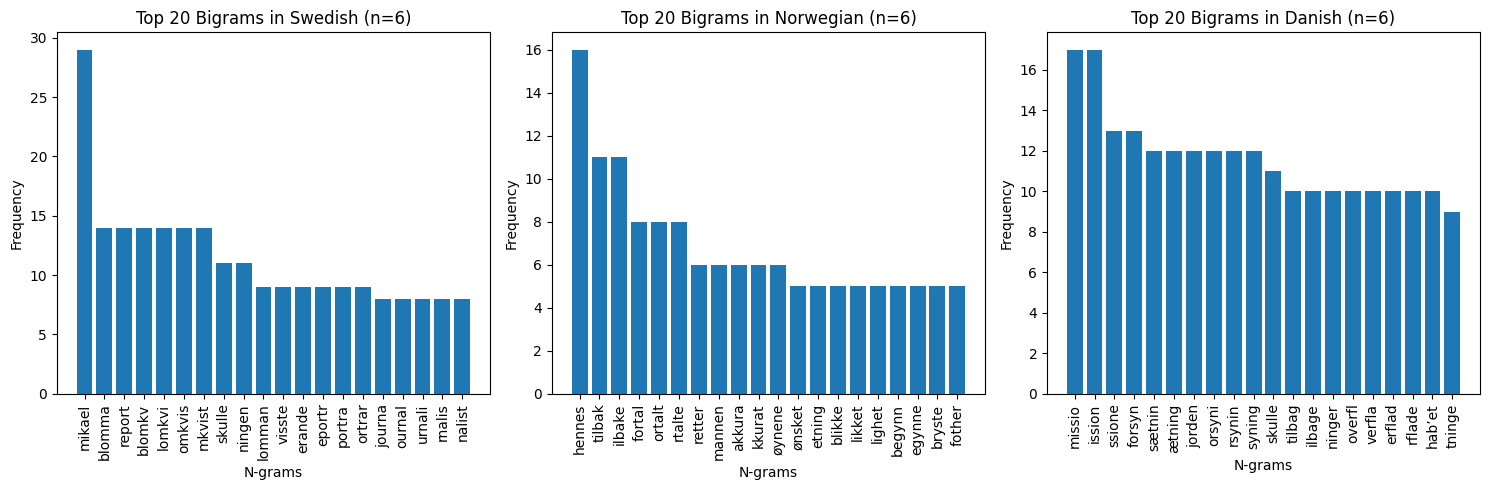

In [208]:
top_language_ngrams_list = []
titles = []

for language, _ in predicted_languages:
    top_language_ngrams = get_top_ngrams(language_dictionaries[language])
    top_language_ngrams_list.append(top_language_ngrams)
    titles.append(f'Top 20 Bigrams in {language.capitalize()} (n={n})')
plot_frequencies_in_row(top_language_ngrams_list, titles)

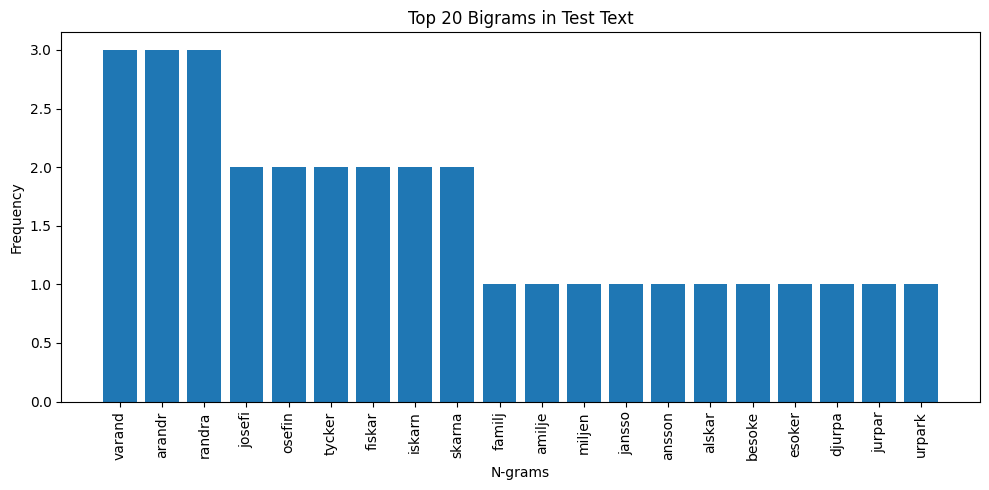

In [209]:
test_bigrams = dictionaries(test_text, numbers, n)
top_test_ngrams = get_top_ngrams(test_bigrams)
plot_frequencies(top_test_ngrams, 'Top 20 Bigrams in Test Text')